In [1]:

"""Data loading tools"""
import yaml
import pandas as pd


def read_config(file_path='./config.yaml'):
    """Reads configuration file
    Args:
        file_path (str, optional): file path
    Returns:
        dict: Parsed configuration file
    """
    with open(file_path, "r") as f:
        return yaml.safe_load(f)

def get_data(file_path=None, nrows=None):
    """Loads data
    Args:
        file_path (str, optional): file path of dataset
            By default load data set from static web page
        nrows (int, optional): number or rows to loads from dataset
            By default loads all dataset  
    Returns:
        dataframe: output dataframe
    """
    if file_path is None:
        cfg = read_config()
        file_path = cfg['paths']['eng_dataset']
    print("Reading dataset ...")    
    return pd.read_csv(file_path,sep="\t", encoding="utf-8",
                       nrows=nrows, low_memory=False)

if __name__ == "__main__":
    data = get_data(file_path = "cleaned_openfoodfacts.csv")
    print(f"data set shape is {data.shape}") 

Reading dataset ...
data set shape is (1839301, 154)


In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
datas = data

In [3]:
def null_factor(df, tx_threshold=50):
  null_rate = ((datas.isnull().sum() / datas.shape[0])*100).sort_values(ascending=False).reset_index()
  null_rate.columns = ['Variable','Taux_de_Null']
  high_null_rate = null_rate[null_rate.Taux_de_Null >= tx_threshold]
  return high_null_rate

In [6]:
full_null_rate = null_factor(datas, 100)
full_null_rate

,Variable,Taux_de_Null


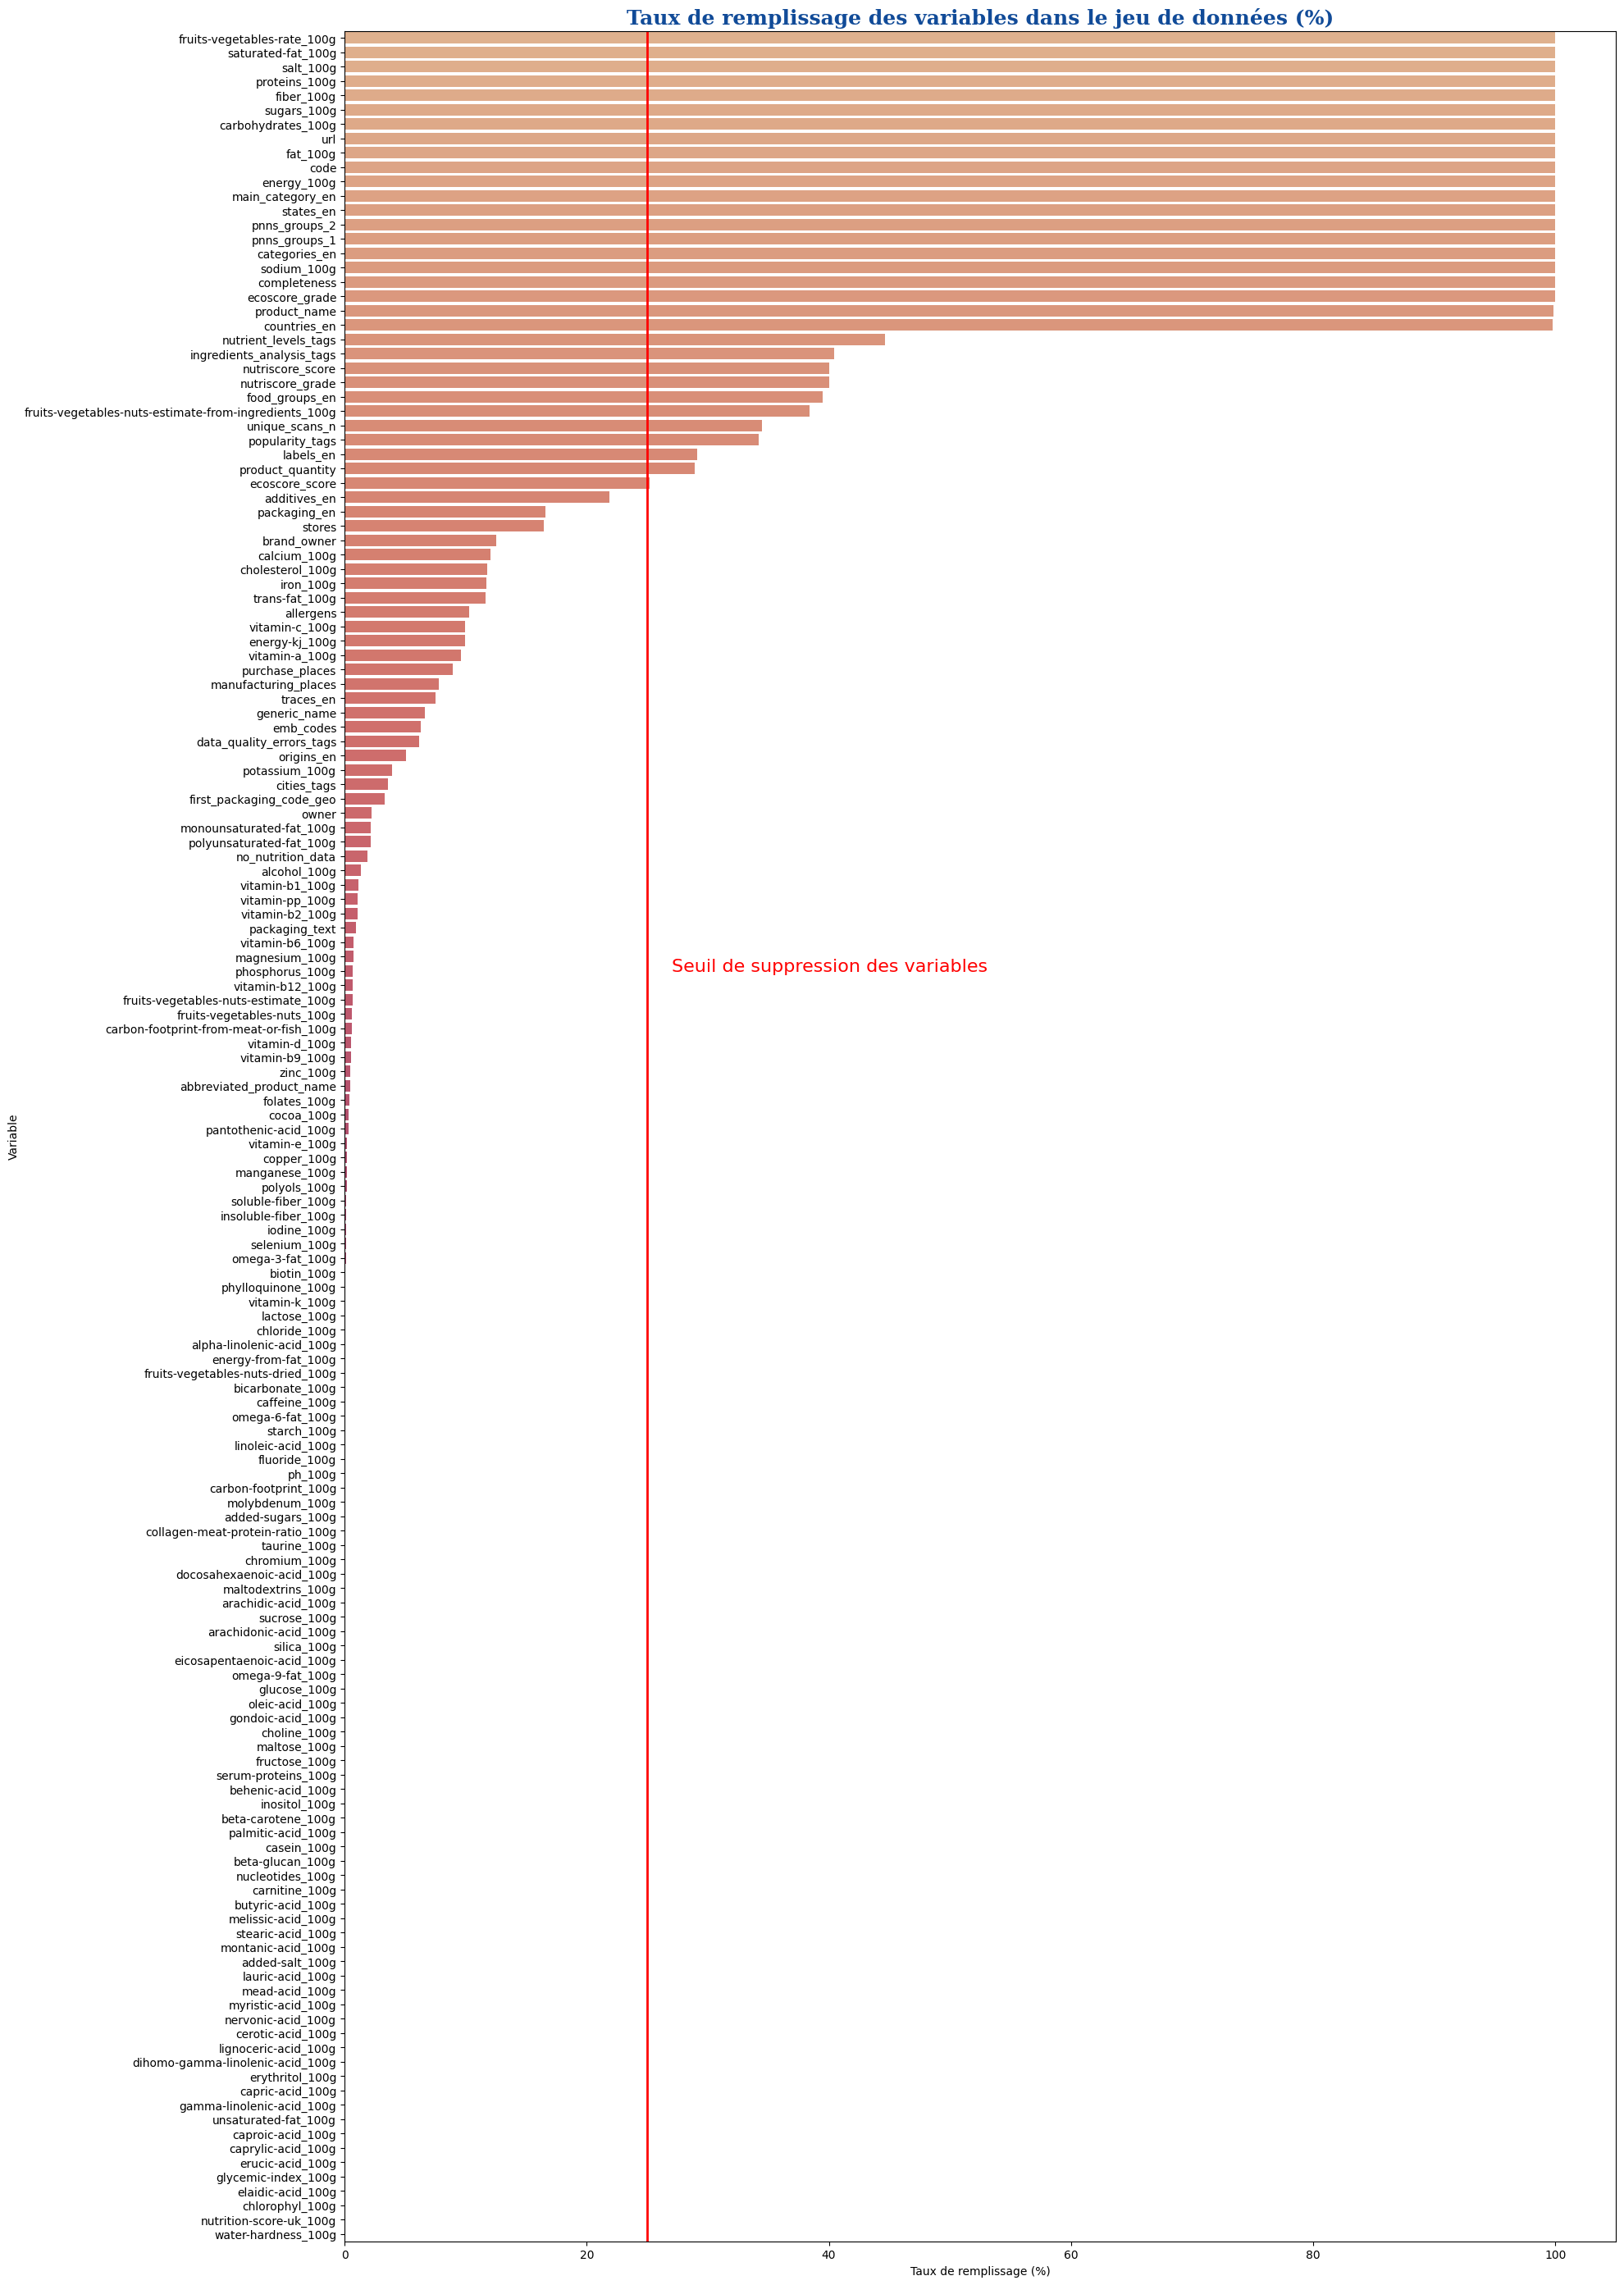

In [9]:
filling_features = null_factor(datas, 0)
filling_features["Taux_de_Null"] = 100-filling_features["Taux_de_Null"]
filling_features = filling_features.sort_values("Taux_de_Null", ascending=False) 

#Seuil de suppression
sup_threshold = 25

fig = plt.figure(figsize=(20, 35))

font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }

sns.barplot(x="Taux_de_Null", y="Variable", data=filling_features, palette="flare")
#Seuil pour suppression des varaibles
plt.axvline(x=sup_threshold, linewidth=2, color = 'r')
plt.text(sup_threshold+2, 65, 'Seuil de suppression des variables', fontsize = 16, color = 'r')

plt.title("Taux de remplissage des variables dans le jeu de données (%)", fontdict=font_title)
plt.xlabel("Taux de remplissage (%)")
plt.show()

In [10]:
#Liste des variables à conserver
features_to_conserve = list(filling_features.loc[filling_features['Taux_de_Null']>=sup_threshold, 'Variable'].values)
#Liste des variables supprimées
deleted_features = list(filling_features.loc[filling_features['Taux_de_Null']<sup_threshold, 'Variable'].values)

#Nouveau Dataset avec les variables conservées
datas = datas[features_to_conserve]
datas.sample(5)

,fruits-vegetables-rate_100g,saturated-fat_100g,salt_100g,proteins_100g,fiber_100g,sugars_100g,carbohydrates_100g,url,fat_100g,code,...,ingredients_analysis_tags,nutriscore_score,nutriscore_grade,food_groups_en,fruits-vegetables-nuts-estimate-from-ingredients_100g,unique_scans_n,popularity_tags,labels_en,product_quantity,ecoscore_score
56669,81,0.000000,0.030000,3.530000,3.500000,2.35000,12.940000,http://world-en.openfoodfacts.org/product/0028...,0.000000,0028800293033,...,"en:palm-oil-free,en:vegan,en:vegetarian",-5.0,a,"Fruits and vegetables,Vegetables",20.0,NaN,NaN,NaN,NaN,NaN
1580386,45,1.900000,1.790000,6.000000,3.000000,6.20000,38.200000,http://world-en.openfoodfacts.org/product/8410...,7.400000,8410076474117,...,NaN,NaN,NaN,NaN,NaN,1.0,"bottom-25-percent-scans-2019,top-80-percent-sc...",No preservatives,NaN,NaN
387727,45,3.333333,0.625000,0.000000,0.000000,70.00000,90.000000,http://world-en.openfoodfacts.org/product/0726...,5.000000,0726098169565,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
984487,45,12.000000,0.700000,5.500000,2.000000,9.90000,33.000000,http://world-en.openfoodfacts.org/product/3999...,19.000000,3999913011029,...,NaN,19.0,e,"Sugary snacks,Pastries",NaN,NaN,NaN,NaN,NaN,44.0
1075505,45,12.121212,0.265152,15.151515,4.545455,30.30303,33.333333,http://world-en.openfoodfacts.org/product/4099...,48.484848,4099100109962,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data = datas

In [14]:
print(data.columns.tolist())

['fruits-vegetables-rate_100g', 'saturated-fat_100g', 'salt_100g', 'proteins_100g', 'fiber_100g', 'sugars_100g', 'carbohydrates_100g', 'url', 'fat_100g', 'code', 'energy_100g', 'main_category_en', 'states_en', 'pnns_groups_2', 'pnns_groups_1', 'categories_en', 'sodium_100g', 'completeness', 'ecoscore_grade', 'product_name', 'countries_en', 'nutrient_levels_tags', 'ingredients_analysis_tags', 'nutriscore_score', 'nutriscore_grade', 'food_groups_en', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'unique_scans_n', 'popularity_tags', 'labels_en', 'product_quantity', 'ecoscore_score']


C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

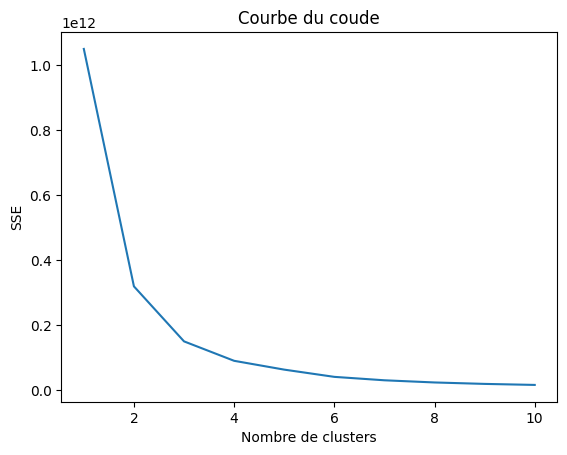

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

#--------------methode du coude pour determiner le nombre de cluster-------------------------------------------------

# Sélection des colonnes à utiliser pour le clustering
X = data[['fruits-vegetables-rate_100g', 'saturated-fat_100g', 'salt_100g', 'proteins_100g', 'fiber_100g', 'sugars_100g', 'carbohydrates_100g', 'fat_100g', 'energy_100g']]

# Tracer la courbe du coude pour déterminer le nombre optimal de clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=0).fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.title('Courbe du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Remplacer les valeurs non numériques par des valeurs manquantes
data.replace(to_replace=['kiliweb', 'additives_n'], value=np.nan, inplace=True)

# Remplacer les valeurs manquantes par la moyenne des valeurs existantes pour chaque colonne
data.fillna(data.mean(), inplace=True)

# Sélection et préparation des données pour le clustering
X = data[['fruits-vegetables-rate_100g', 'saturated-fat_100g', 'salt_100g', 'proteins_100g', 'fiber_100g', 'sugars_100g', 'carbohydrates_100g', 'fat_100g', 'energy_100g']]

# Implémentation des méthodes de clustering
kmeans = KMeans(n_clusters=3)
agglo = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.1)

# Entraînement des modèles de clustering
kmeans.fit(X)
agglo.fit(X)
dbscan.fit(X)

# Affichage des résultats
print("KMeans labels:", kmeans.labels_)
print("AgglomerativeClustering labels:", agglo.labels_)
print("DBSCAN labels:", dbscan.labels_)

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Création des graphiques pour KMeans
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['energy_100g'], y=X['fat_100g'], hue=kmeans.labels_, palette='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Energy per 100g')
plt.ylabel('Fat per 100g')
plt.show()

# Création des graphiques pour AgglomerativeClustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['energy_100g'], y=X['fat_100g'], hue=agglo.labels_, palette='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Energy per 100g')
plt.ylabel('Fat per 100g')
plt.show()

# Création des graphiques pour DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['energy_100g'], y=X['fat_100g'], hue=dbscan.labels_, palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Energy per 100g')
plt.ylabel('Fat per 100g')
plt.show()